In [1]:
#pip install opendatasets --upgrade
#od.download('dataset_name')

# Exploratory data analysis report on stack overflow annual developer survey

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## Loading data into a data frame

In [3]:
survey_raw_df = pd.read_csv('survey_results_public.csv')

In [4]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [5]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [6]:
schema_df = pd.read_csv('survey_results_schema.csv',index_col='Column').QuestionText

In [7]:
schema_df

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [8]:
schema_df['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [9]:
  selected_columns = np.array([#Demographics
                       'Country','Age','Gender','EdLevel','UndergradMajor',
                      #programming exp
                        'Hobbyist', 'Age1stCode', 'YearsCode','YearsCodePro',
                        'LanguageDesireNextYear', 'LanguageWorkedWith','NEWStuck',
                        'NEWLearn',
                       #Employment
                        'Employment','DevType',
                        'WorkWeekHrs','JobFactors','JobSat',
                        'NEWEdImpt','NEWOvertime',
                      ])

In [10]:
selected_columns.shape

(20,)

## Copying columns to analyze

In [11]:
survey_df = survey_raw_df[selected_columns].copy()

In [12]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageDesireNextYear,LanguageWorkedWith,NEWStuck,NEWLearn,Employment,DevType,WorkWeekHrs,JobFactors,JobSat,NEWEdImpt,NEWOvertime
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Visit Stack Overflow;Go for a walk or other ph...,Once a year,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,"Languages, frameworks, and other technologies ...",Slightly satisfied,Fairly important,Often: 1-2 days per week or more
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,Python;Swift,JavaScript;Swift,Visit Stack Overflow;Go for a walk or other ph...,Once a year,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,NaN,Very dissatisfied,Fairly important,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,NaN,Once a year,NaN,NaN,40.0,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,Not at all important/not necessary,Occasionally: 1-2 days per quarter but less th...
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,Java;Ruby;Scala,HTML/CSS;Ruby;SQL,Call a coworker or friend;Visit Stack Overflow...,Once a year,Employed full-time,NaN,NaN,NaN,NaN,Very important,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Call a coworker or friend,Once a decade,Employed full-time,Senior executive/VP,NaN,NaN,NaN,Very important,NaN
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS;Java;JavaScript,HTML/CSS,Call a coworker or friend;Visit Stack Overflow,Once a year,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
schema = schema_df[selected_columns].copy()

In [14]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
LanguageWorkedWith        Which programming, scripting, and markup langu...
NEWStuck                  What do you do when you get stuck on a problem...
NEWLearn                  How frequently do you learn a new language or ...
Emplo

In [15]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageDesireNextYear  54113 non-null  object 
 10  LanguageWorkedWith      57378 non-null  object 
 11  NEWStuck                54983 non-null  object 
 12  NEWLearn                56156 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

## Data Cleaning

In [16]:
#counting NaN values
(survey_df['Age'].isnull().sum()*100)/(64461)

29.49845643102031

In [17]:
survey_df['Age1stCode'].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [18]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode,errors = 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode,errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro,errors = 'coerce')

In [19]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [20]:
survey_df.drop(survey_df[survey_df.Age<10].index,inplace=True)
survey_df.drop(survey_df[survey_df.Age>100].index,inplace=True)

In [21]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index,inplace=True)

In [22]:
survey_df.Gender.unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [23]:
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)),np.nan,inplace=True)

In [24]:
survey_df.Gender.value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [25]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [26]:
#country
survey_df.Country.nunique()

183

In [27]:
top_countries = survey_df.Country.value_counts().head(10);top_countries

United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: Country, dtype: int64

## Top countries with most responses

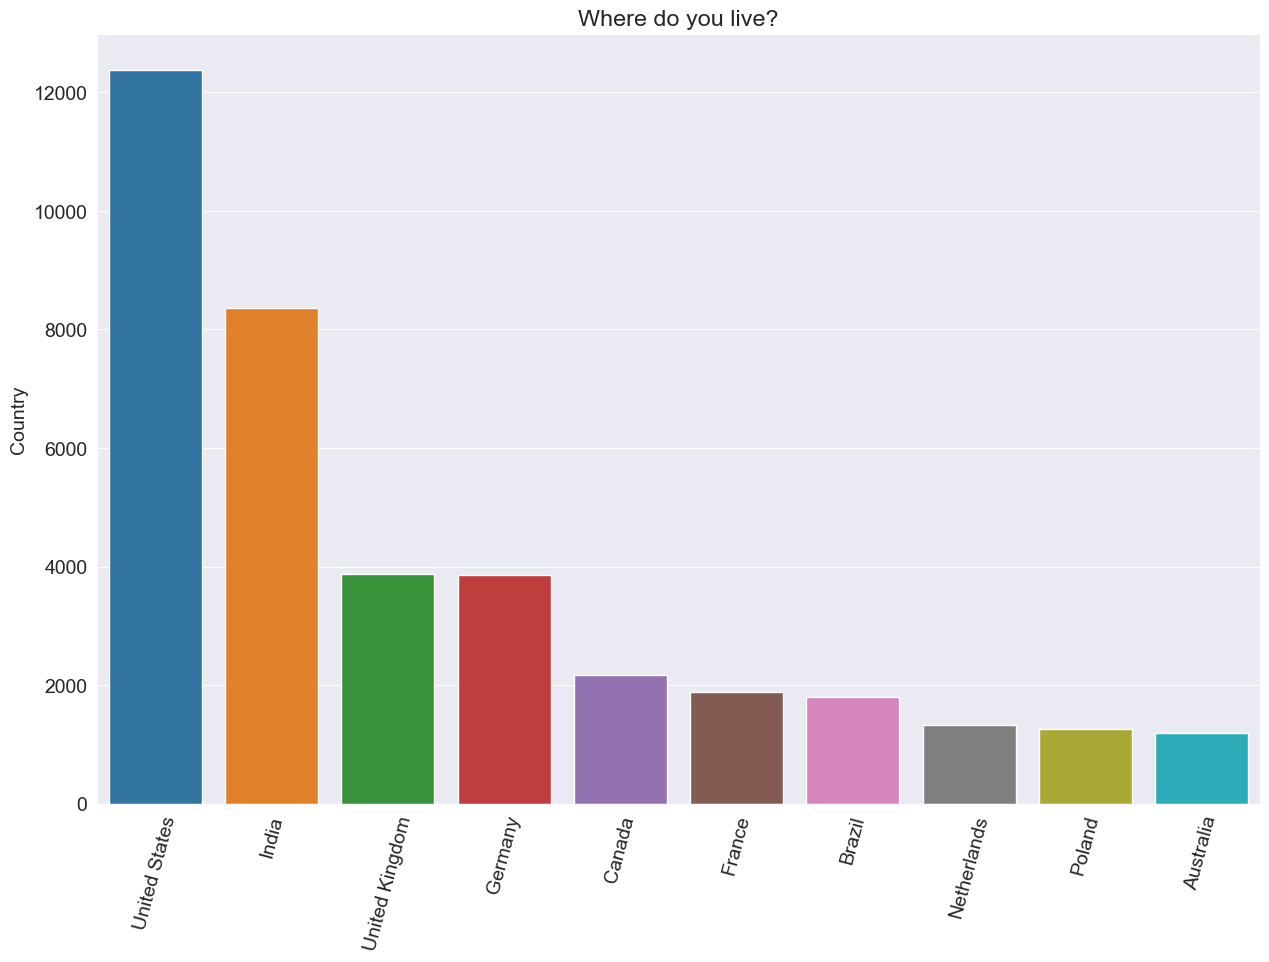

In [28]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index,y=top_countries);

## Age of Respondents 

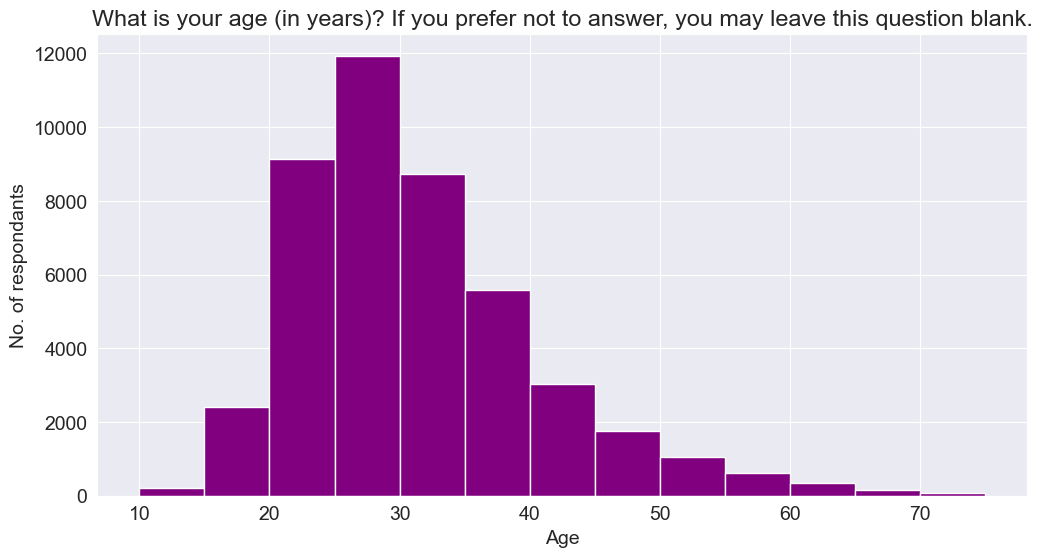

In [29]:
plt.title(schema.Age)
plt.ylabel('No. of respondants')
plt.xlabel('Age')
plt.hist(survey_df.Age,bins = np.arange(10,80,5),color='purple');

## Gender of Respondants

In [30]:
gender_counts= survey_df.Gender.value_counts()

In [31]:
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

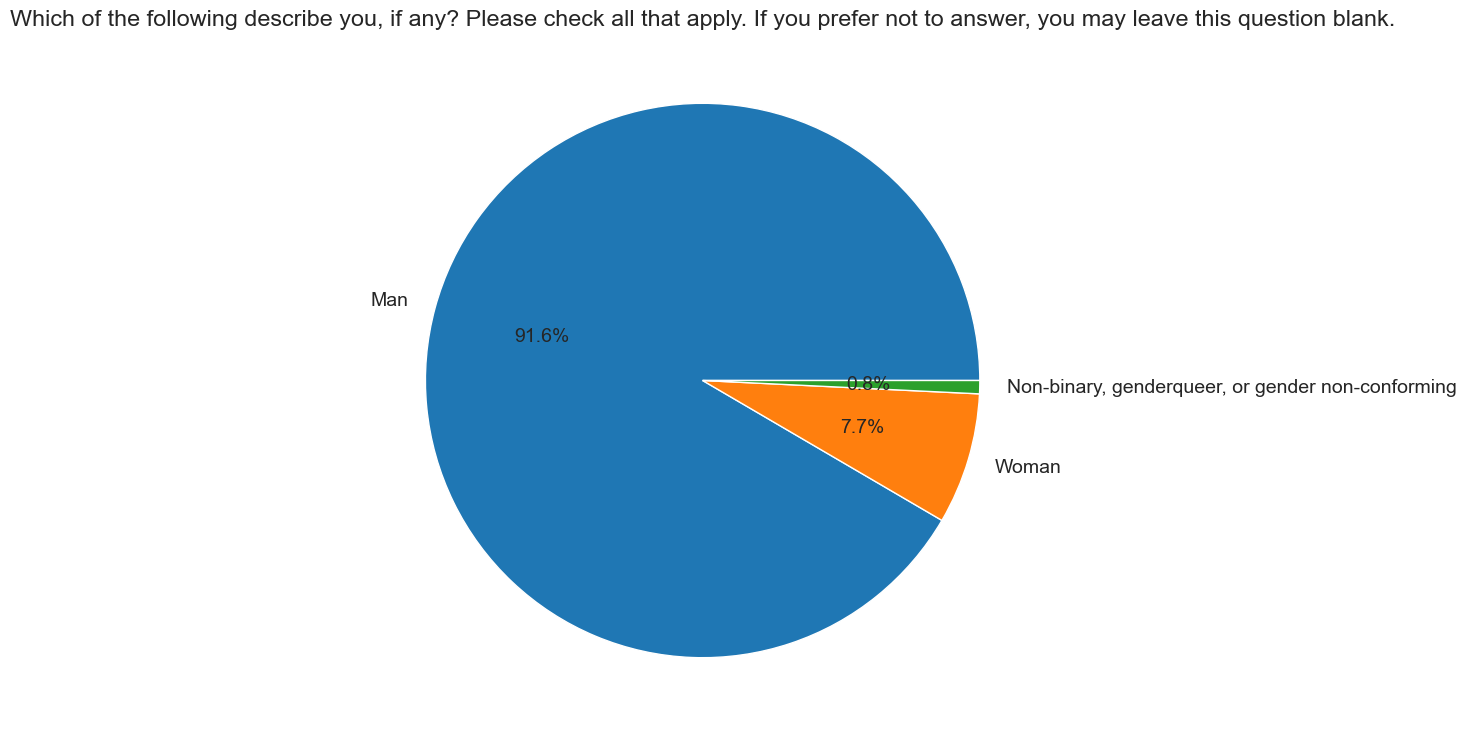

In [32]:
plt.figure(figsize=(9,9))
plt.title(schema.Gender)
plt.pie(gender_counts,labels = gender_counts.index,autopct='%1.1f%%');

## Education Level of the respondants

In [33]:
survey_df.EdLevel.nunique()

9

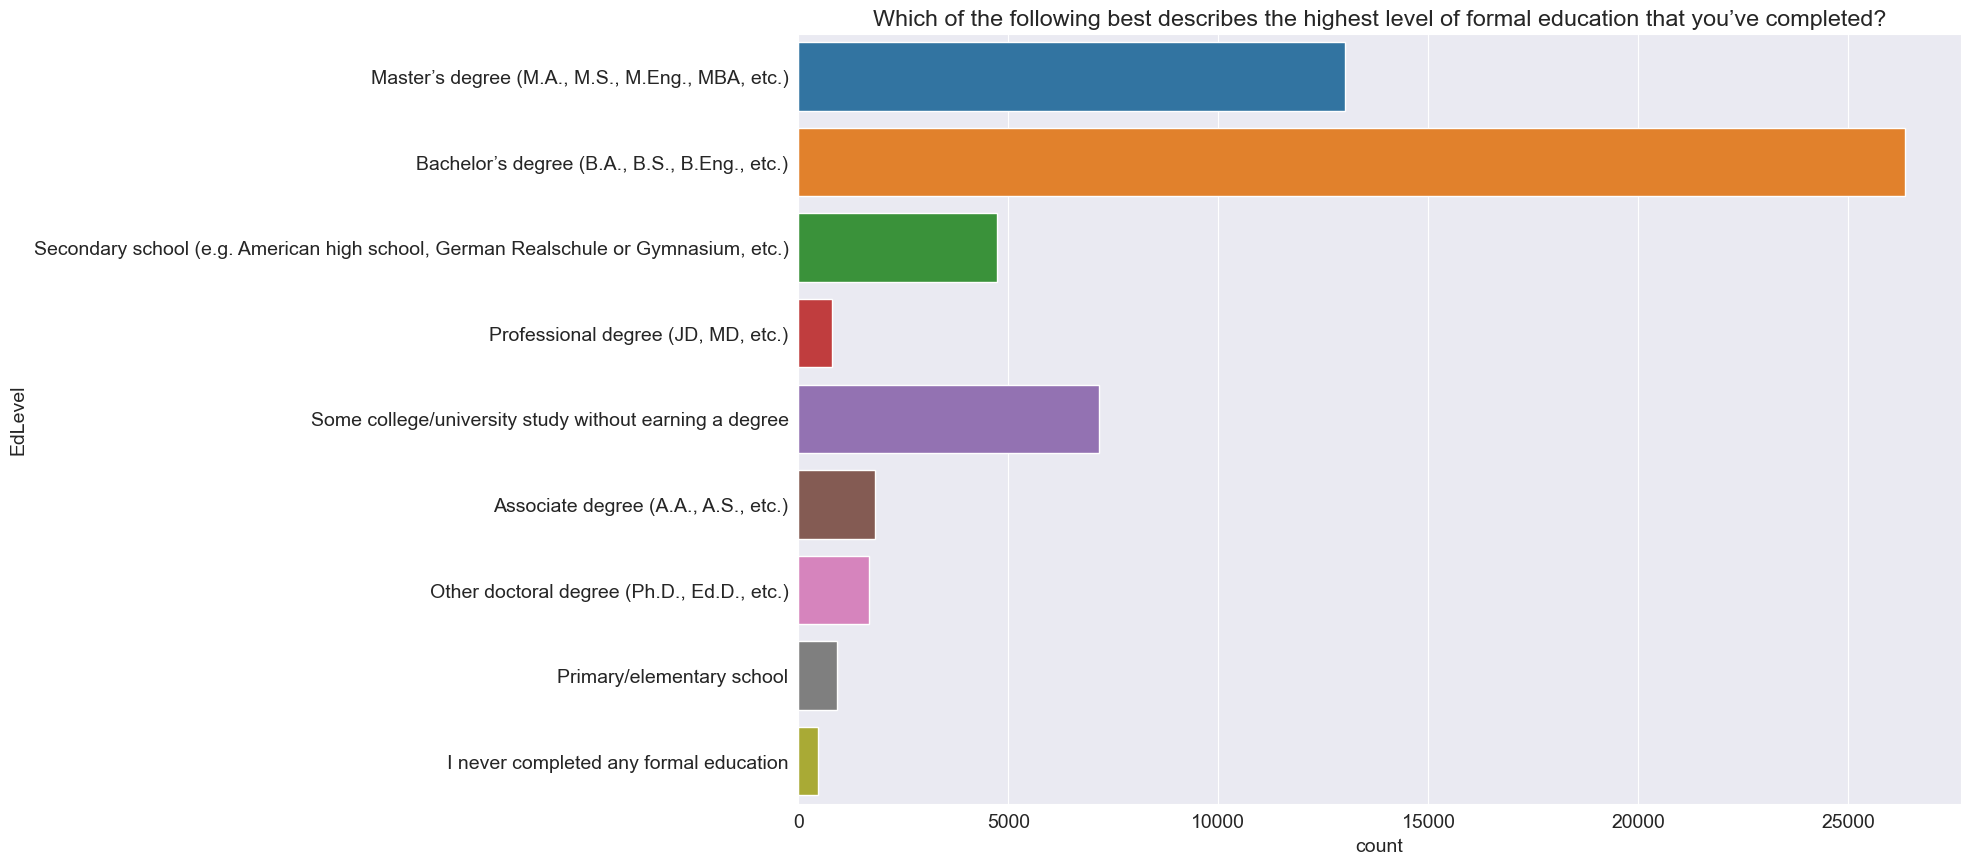

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(y=survey_df.EdLevel)
plt.title(schema.EdLevel);

## Field of study during Undergrad

In [35]:
undergrad_pct = survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count()

In [36]:
undergrad_pct

Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                                        

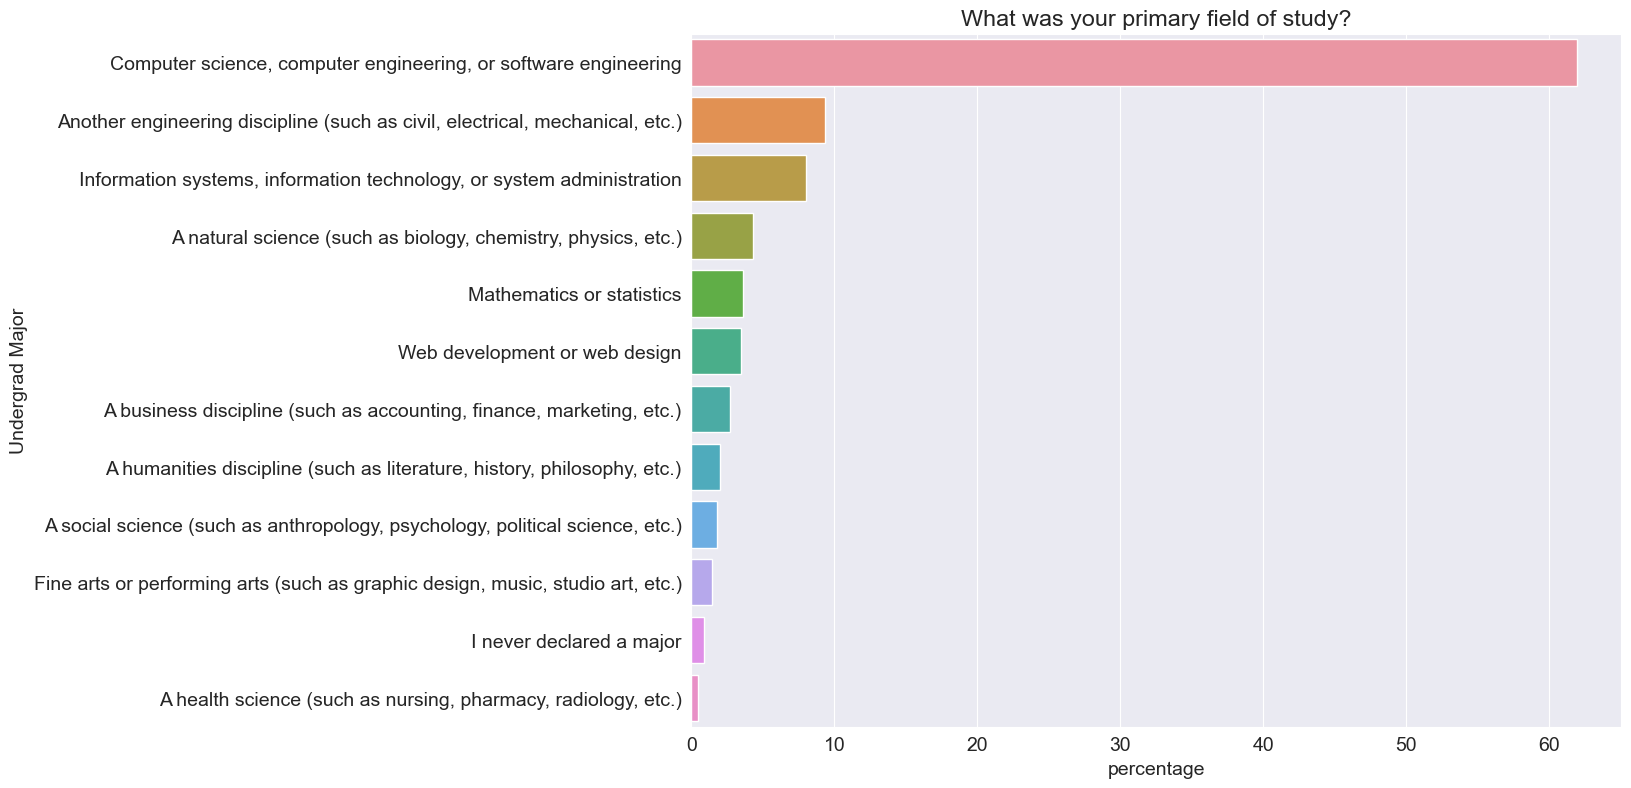

In [37]:
plt.figure(figsize=(12,9))
plt.title(schema.UndergradMajor)
plt.ylabel('Undergrad Major')
sns.barplot(x=undergrad_pct,y=undergrad_pct.index)
plt.xlabel('percentage');

## Type of employment of respondents

In [38]:
survey_df.Employment.nunique()

7

In [39]:
Employment = survey_df.Employment.value_counts()*100/survey_df.Employment.count()

In [40]:
Employment

Employed full-time                                      70.918383
Student                                                 12.199893
Independent contractor, freelancer, or self-employed     8.863615
Not employed, but looking for work                       3.665962
Employed part-time                                       3.470360
Not employed, and not looking for work                   0.501625
Retired                                                  0.380162
Name: Employment, dtype: float64

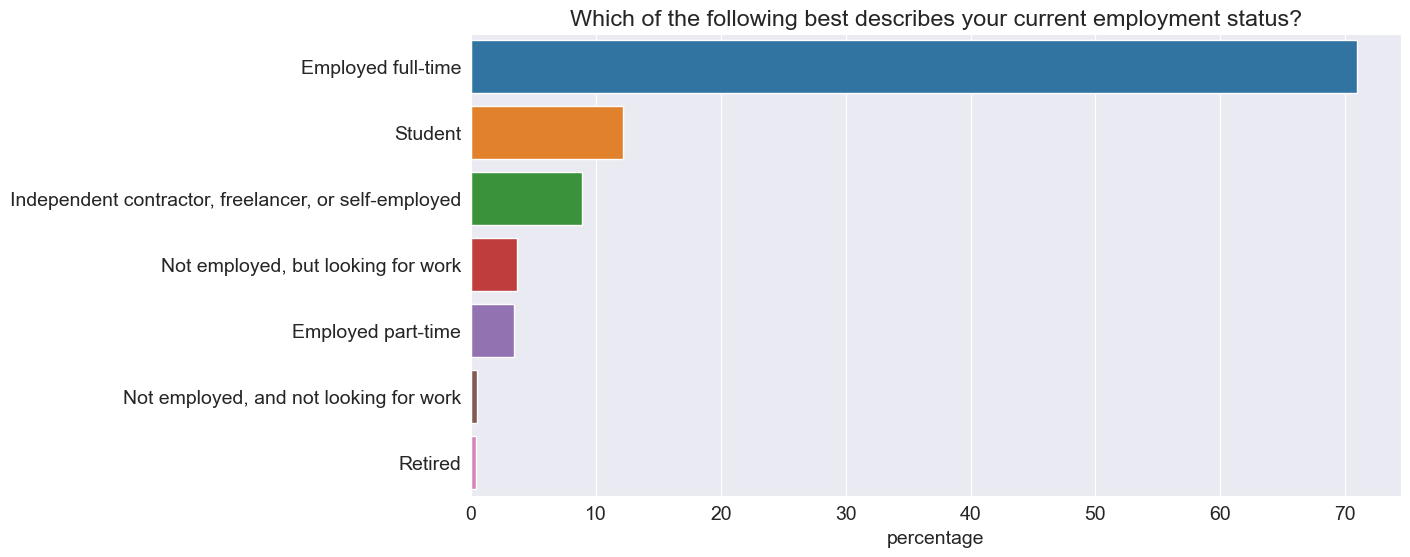

In [41]:
plt.title(schema.Employment)
sns.barplot(x=Employment,y=Employment.index)
plt.xlabel('percentage');

## Type of developer 

In [42]:
survey_df.DevType

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
64456                                  Senior executive/VP
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: DevType, Length: 64306, dtype: object

In [43]:
#splitting data into multiple columns because of multiple responses

def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx,value in col_series[col_series.notnull()].items():
        for option in value.split(';'):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx,option] = True
    return result_df[options]

In [44]:
devtype_df = split_multicolumn(survey_df.DevType)

In [45]:
devtype_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
devtype_pct = devtype_df.sum()*100/devtype_df.count();devtype_pct

Developer, desktop or enterprise applications    18.174043
Developer, full-stack                            41.854570
Developer, mobile                                14.626940
Designer                                          8.182751
Developer, front-end                             28.190216
Developer, back-end                              41.980531
Developer, QA or test                             6.053867
DevOps specialist                                 9.198209
Developer, game or graphics                       4.277983
Database administrator                            8.798557
Developer, embedded applications or devices       7.310360
Engineer, data                                    5.753740
Educator                                          4.501913
System administrator                              8.063011
Engineering manager                               4.197120
Product manager                                   3.842565
Data or business analyst                          6.1736

## Percentage plot of different types of developers

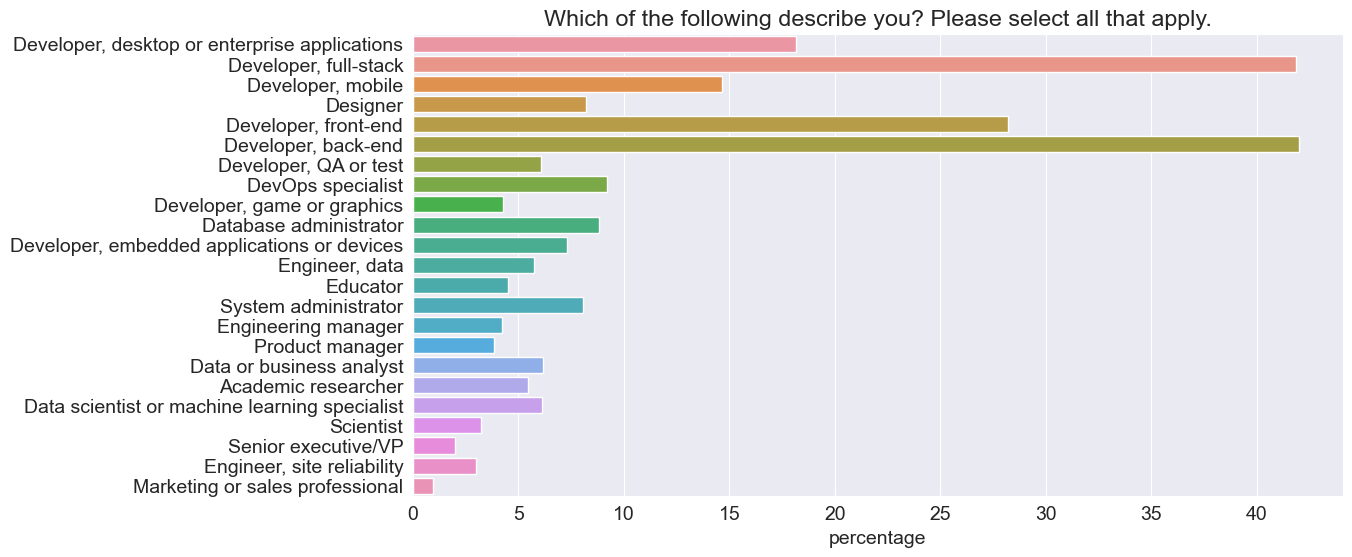

In [47]:
sns.barplot(x=devtype_pct,y=devtype_pct.index);
plt.title(schema.DevType)
plt.xlabel('percentage');

## Pie chart of people who do coding as a hobby

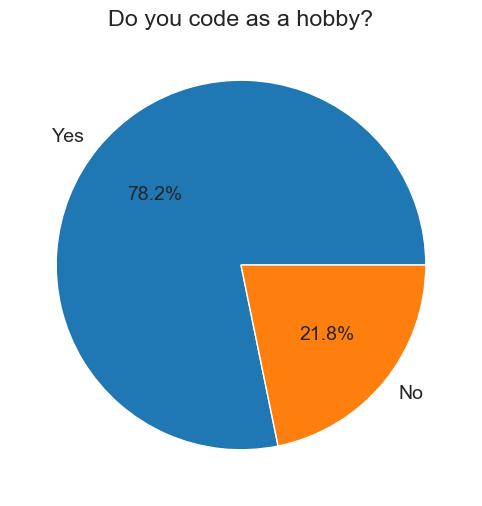

In [48]:
plt.title(schema.Hobbyist)
plt.pie(survey_df.Hobbyist.value_counts(),
        labels = survey_df.Hobbyist.value_counts().index,
        autopct='%1.1f%%');

In [49]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
LanguageWorkedWith        Which programming, scripting, and markup langu...
NEWStuck                  What do you do when you get stuck on a problem...
NEWLearn                  How frequently do you learn a new language or ...
Emplo

In [50]:
#'Very satisfied' = 10
#'Very dissatisfied' = 0
#'Slightly satisfied' = 7.5
#'Slightly dissatisfied' = 2.5
#'Neither satisfied nor dissatisfied' = 5
survey_df.replace({'JobSat':{10:'Very satisfied',0:'Very dissatisfied',
                            7.5:'Slightly satisfied',2.5:'Slightly dissatisfied',
                            5:'Neither satisfied nor dissatisfied'}},inplace = True)

In [51]:
work_sat = survey_df[['WorkWeekHrs','JobSat']]

In [52]:
work_sat=work_sat.groupby(['JobSat']).mean();work_sat

,WorkWeekHrs
JobSat,
Neither satisfied nor dissatisfied,39.554140
Slightly dissatisfied,39.895623
Slightly satisfied,39.798125
Very dissatisfied,40.442468
Very satisfied,40.380044


## Variation of Work hours per week to Job satisfaction

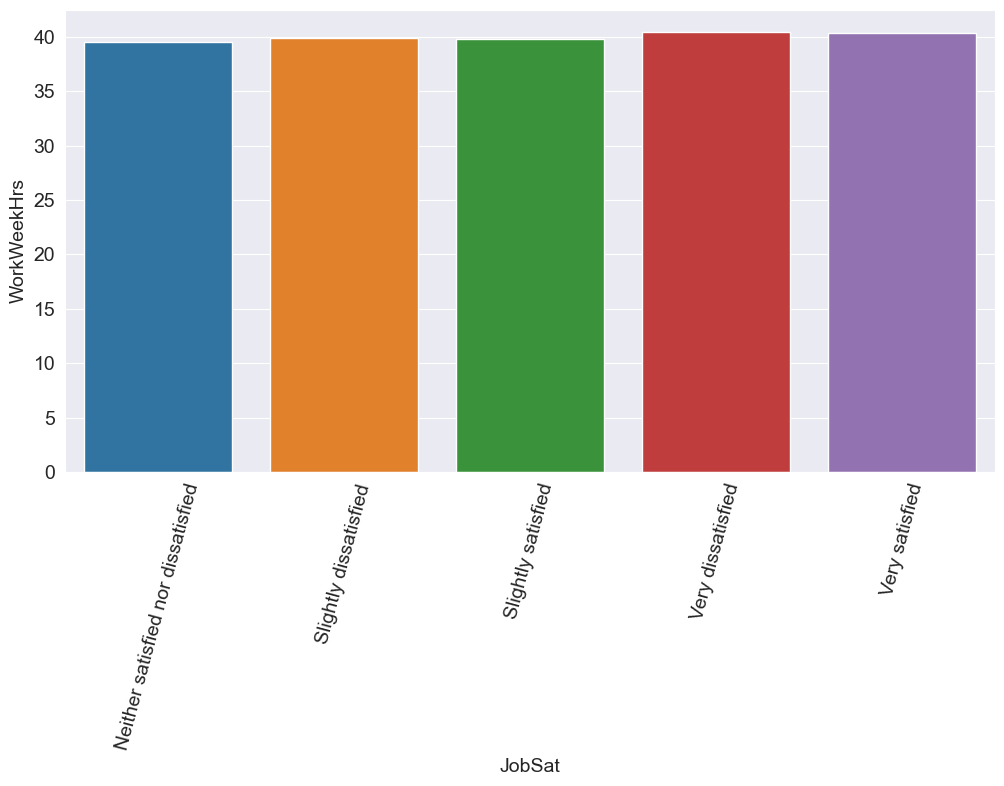

In [53]:
plt.xticks(rotation=75)
sns.barplot(x = work_sat.index,y=work_sat.WorkWeekHrs);

In [54]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [55]:
survey_df.LanguageWorkedWith.nunique()

14169

In [56]:
lang_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [57]:
lang_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
lang_pct = lang_df.mean().sort_values(ascending=False)*100

## Most worked with languages of the year

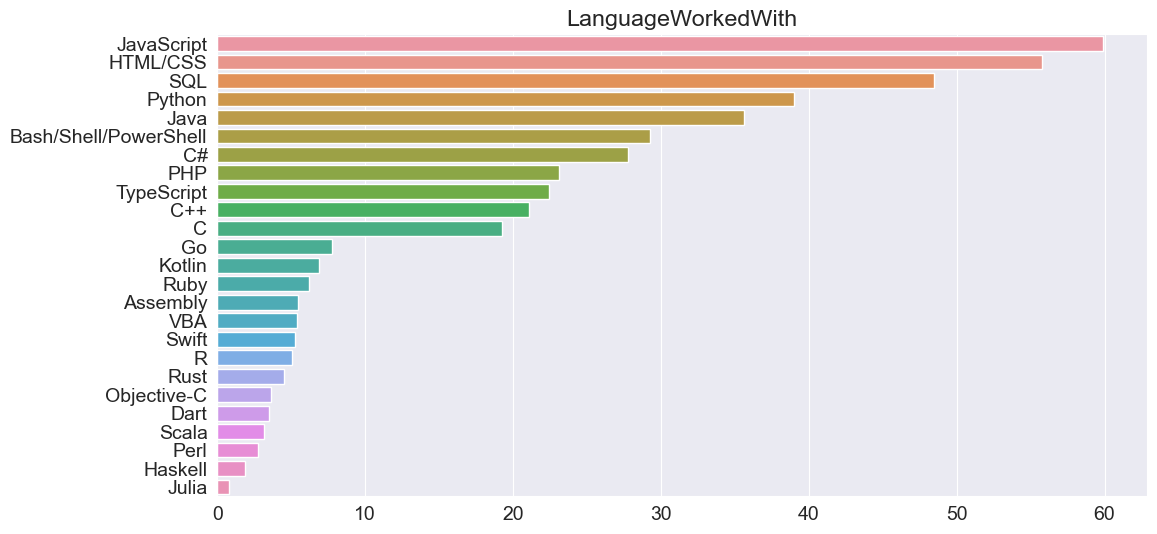

In [59]:
plt.title('LanguageWorkedWith')
sns.barplot(y = lang_pct.index , x = lang_pct);

In [60]:
langDesired_df = split_multicolumn(survey_df.LanguageDesireNextYear)

In [61]:
langDesired_df

,C#,HTML/CSS,JavaScript,Python,Swift,Objective-C,Java,Ruby,Scala,PHP,...,Assembly,Bash/Shell/PowerShell,C,Haskell,Perl,C++,Julia,Kotlin,Dart,VBA
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
langDesired_pct = langDesired_df.mean().sort_values(ascending=False)*100

## Most desired language of the next year

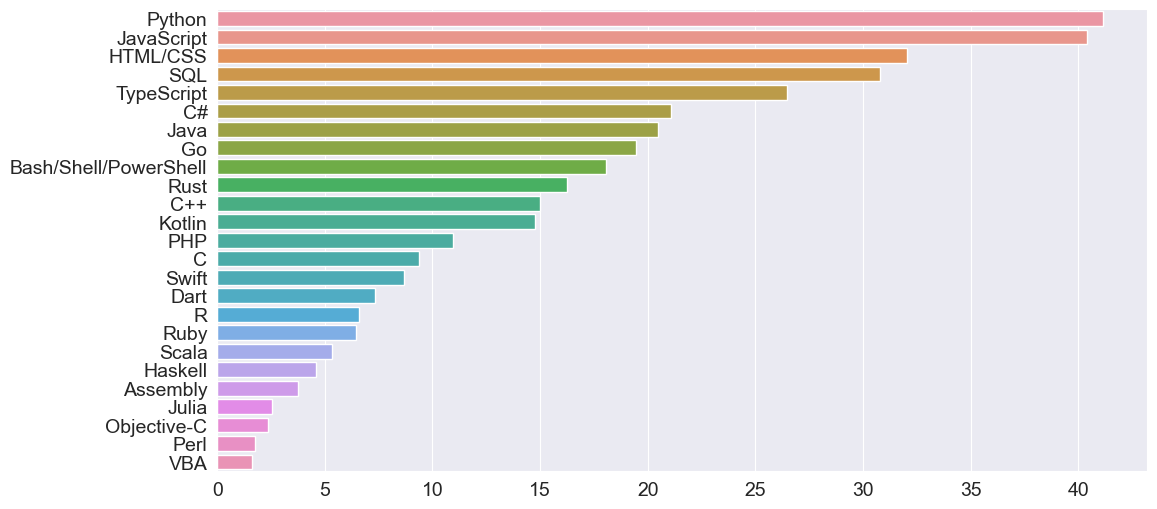

In [63]:
sns.barplot(x = langDesired_pct , y = langDesired_pct.index);

In [64]:
lang_mostLoved = langDesired_df & lang_df

In [67]:
lang_mostLoved

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
lang_mostLoved_pct = lang_mostLoved.mean().sort_values(ascending=False)*100

## Most loved language 

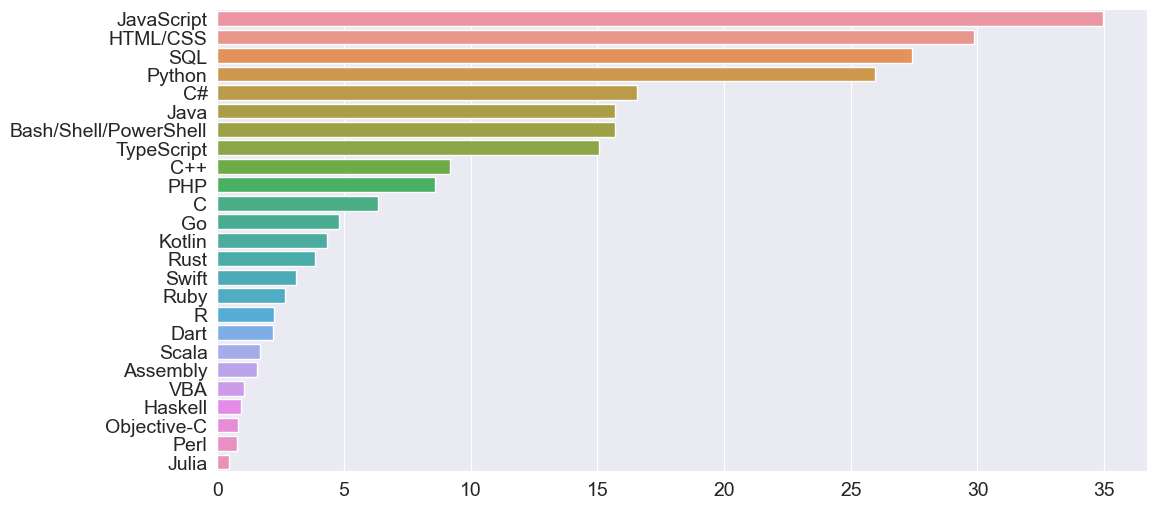

In [80]:
sns.barplot(x = lang_mostLoved_pct , y = lang_mostLoved_pct.index);

In [ ]:
country_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean()

In [ ]:
country_df.sort_values(by='WorkWeekHrs' ,ascending =False)

In [ ]:
x = survey_df.Country.value_counts()>250

In [ ]:
country_df.loc[x].sort_values(by = 'WorkWeekHrs',ascending = False).head(15)

In [ ]:
schema.YearsCodePro

In [ ]:
schema.Age

## Years of coding experience of respondents

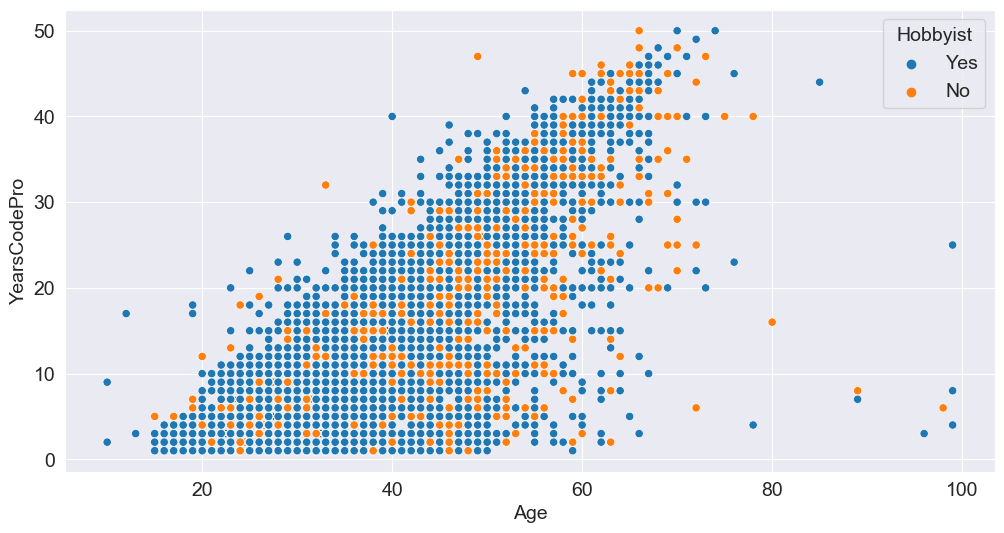

In [68]:
sns.scatterplot(y = survey_df.YearsCodePro,x =survey_df.Age,hue = survey_df.Hobbyist);

In [ ]:
schema.Age1stCode

In [ ]:
survey_df.Age1stCode.unique()

## Age at which people started coding

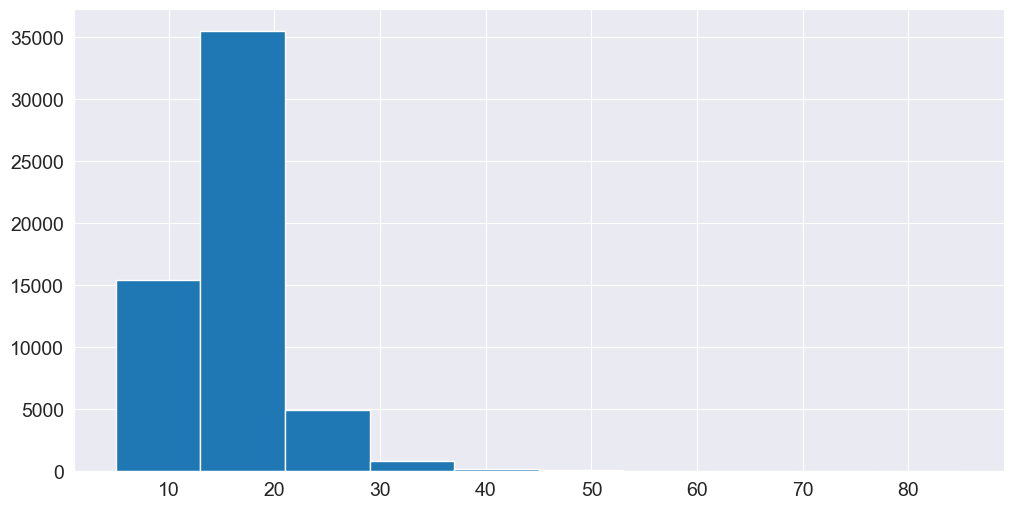

In [69]:
plt.hist(survey_df.Age1stCode);

In [72]:
# in which country people code as a hobby 
hobby_df = survey_df[survey_df.Hobbyist=='Yes'].groupby('Country').Hobbyist.value_counts().sort_values(ascending=False).head(8)

In [73]:
hobby_df = hobby_df.reset_index(level='Hobbyist', drop=True)

## Countries where people code as a hobby

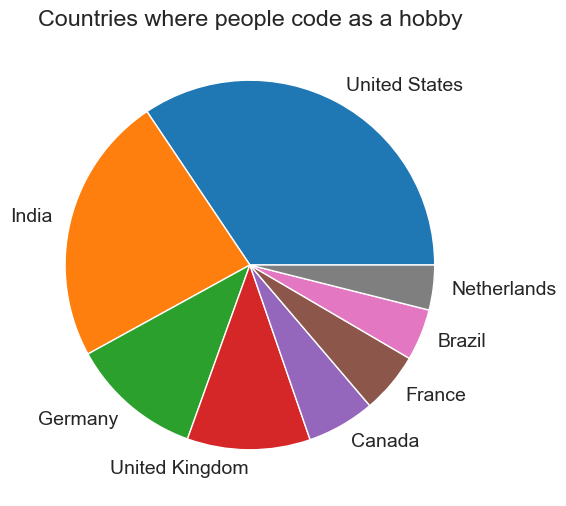

In [74]:
plt.pie(hobby_df,labels = hobby_df.index);
plt.title('Countries where people code as a hobby');

# Conclusion of the exploratory data analysis

Based on the demographics of the survey respondents, we can infer that the survey is :-<br>
- Somewhat representative of the overall programming community, although it definitely has fewer responses from programmers in non-English-speaking countries and from women & non-binary genders.
- The programming community is not as diverse as it can be, and although things are
improving, we should take more efforts to support & encourage members of underrepresented
communities - whether it is in terms of age, country, race, gender or otherwise.
-  Most programmers hold a college degree, although a fairly large percentage did not have
computer science as their major in college, so a computer science degree isn't compulsory for
learning to code or building a career in programming.
-  A significant percentage of programmers either work part time or as freelancers, and this can
be a great way to break into the field, especially when you're just getting started.
-  Javascript & HTML/CSS are the most used programming languages in 2020, closely followed
by SQL & Python
- Python is the language most people are interested in learning - since it is an easy-to-learn
general purpose programming language well suited for a variety of domains.